In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

Init Plugin
Init Graph Optimizer
Init Kernel


In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/Users/abhisheksingh/Desktop/Anandi project/Malaria-Detection-master/Dataset/Train'
valid_path = '/Users/abhisheksingh/Desktop/Anandi project/Malaria-Detection-master/Dataset/Test'

In [3]:
vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

Metal device set to: Apple M1


2022-03-16 19:32:39.055605: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-16 19:32:39.055850: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [5]:
# don't train existing weights
for layer in vgg19.layers:
    layer.trainable = False

In [6]:
  # useful for getting number of output classes
folders = glob('/Users/abhisheksingh/Desktop/Anandi project/Malaria-Detection-master/Dataset/Train/*')

In [7]:
folders

['/Users/abhisheksingh/Desktop/Anandi project/Malaria-Detection-master/Dataset/Train/Parasite',
 '/Users/abhisheksingh/Desktop/Anandi project/Malaria-Detection-master/Dataset/Train/Uninfected']

In [8]:

x = Flatten()(vgg19.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg19.input, outputs=prediction)

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [13]:
from tensorflow.keras.layers import MaxPooling2D

In [15]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 50176)            

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/Users/abhisheksingh/Desktop/Anandi project/Malaria-Detection-master/Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [14]:
test_set = test_datagen.flow_from_directory('/Users/abhisheksingh/Desktop/Anandi project/Malaria-Detection-master/Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [15]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/Users/abhisheksingh/miniforge3/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-03-16 19:33:08.414350: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-03-16 19:33:08.415519: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/50


2022-03-16 19:33:08.763836: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - ETA: 0s - loss: 1.2895 - accuracy: 0.5505

2022-03-16 19:33:18.691260: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - 13s 980ms/step - loss: 1.2895 - accuracy: 0.5505 - val_loss: 0.6239 - val_accuracy: 0.6716
Epoch 2/50
13/13 [==============================] - 12s 948ms/step - loss: 0.6394 - accuracy: 0.6659 - val_loss: 0.5214 - val_accuracy: 0.6940
Epoch 3/50
13/13 [==============================] - 12s 930ms/step - loss: 0.4763 - accuracy: 0.7596 - val_loss: 0.8208 - val_accuracy: 0.5970
Epoch 4/50
13/13 [==============================] - 12s 946ms/step - loss: 0.4557 - accuracy: 0.7716 - val_loss: 0.6062 - val_accuracy: 0.7090
Epoch 5/50
13/13 [==============================] - 12s 955ms/step - loss: 0.4544 - accuracy: 0.7668 - val_loss: 0.4103 - val_accuracy: 0.8060
Epoch 6/50
13/13 [==============================] - 12s 953ms/step - loss: 0.3197 - accuracy: 0.8822 - val_loss: 0.4664 - val_accuracy: 0.7612
Epoch 7/50
13/13 [==============================] - 12s 950ms/step - loss: 0.2534 - accuracy: 0.9087 - val_loss: 0.3775 - val_accuracy: 0.8507
Epoch 8/50

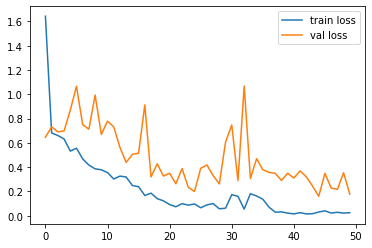

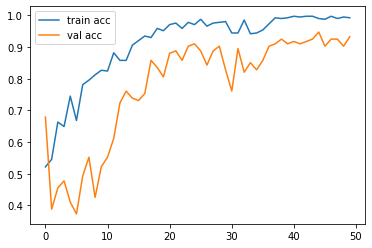

<Figure size 432x288 with 0 Axes>

In [21]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [22]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [23]:
y_pred = model.predict(test_set)


2022-03-10 17:47:45.747604: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [24]:
y_pred

array([[7.85859823e-02, 9.21414077e-01],
       [1.00000000e+00, 1.57134410e-11],
       [1.00000000e+00, 5.54948379e-11],
       [1.00000000e+00, 1.67400493e-08],
       [1.00000000e+00, 2.19564394e-10],
       [1.00000000e+00, 1.81356520e-17],
       [9.99999046e-01, 9.35798028e-07],
       [2.54850159e-03, 9.97451484e-01],
       [1.00000000e+00, 9.20254359e-11],
       [9.99937415e-01, 6.25230750e-05],
       [9.99999881e-01, 8.34266913e-08],
       [1.00000000e+00, 5.12424990e-15],
       [9.99999285e-01, 7.48070761e-07],
       [1.00000000e+00, 4.51509950e-13],
       [6.54589059e-03, 9.93454099e-01],
       [1.60725378e-02, 9.83927429e-01],
       [1.07703358e-02, 9.89229620e-01],
       [5.63277304e-02, 9.43672299e-01],
       [3.04054609e-03, 9.96959448e-01],
       [9.99999881e-01, 6.27865546e-08],
       [3.47950831e-02, 9.65205014e-01],
       [9.99995589e-01, 4.40938356e-06],
       [9.99982834e-01, 1.71707743e-05],
       [9.96557236e-01, 3.44284833e-03],
       [9.999992

In [25]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [26]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0])

In [27]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [28]:
odel=load_model('model_vgg19.h5')

In [29]:
img=image.load_img('/Users/abhisheksingh/Desktop/Anandi project/Malaria-Detection-master/Dataset/Test/Uninfected/2.png',target_size=(224,224))

In [30]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [31]:
x.shape

(224, 224, 3)

In [32]:
x=x/255

In [33]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [34]:
model.predict(img_data)

2022-03-10 17:50:19.793181: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([[0., 1.]], dtype=float32)

In [35]:
a=np.argmax(model.predict(img_data), axis=1)

In [36]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected
